In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [9]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [12]:
data  = pd.read_csv('heart.csv')

In [13]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Ranked list of feature by importance:
           Feature  Importance
10        ST_Slope    0.225673
2    ChestPainType    0.126661
7            MaxHR    0.111505
4      Cholesterol    0.106795
9          Oldpeak    0.106379
0              Age    0.078634
8   ExerciseAngina    0.078549
3        RestingBP    0.072586
1              Sex    0.042415
6       RestingECG    0.025483
5        FastingBS    0.025318


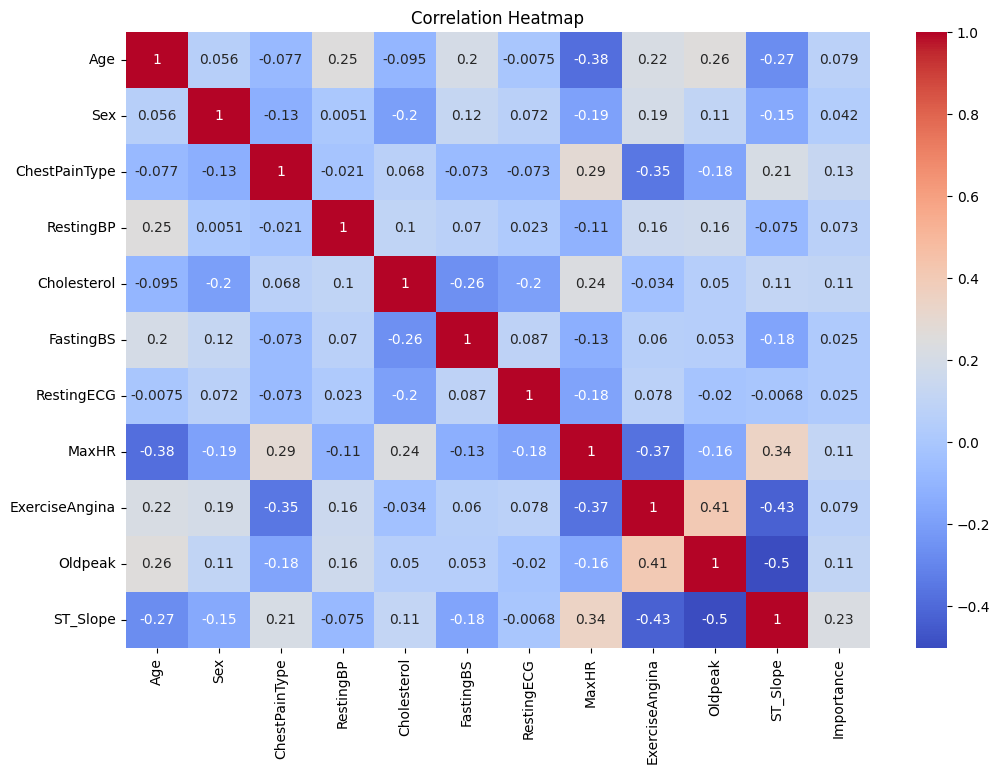

In [16]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ChestPainType'] = label_encoder.fit_transform(data['ChestPainType'])
data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = label_encoder.fit_transform(data['ST_Slope'])

x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x, y)

feature_importances = rf_classifier.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print("Ranked list of feature by importance:")
print(feature_importances_df)

corr_matrix = x.corr()
importances_matrix = pd.DataFrame(corr_matrix)
importances_matrix['Importance'] = feature_importances
plt.figure(figsize=(12, 8))
sns.heatmap(importances_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()